# SciPy Comprehensive Guide: Scientific Computing in Python

## 1. Introduction and Setup

SciPy (Scientific Python) is a fundamental library for scientific and technical computing. It builds on NumPy's array capabilities, providing additional functionality for optimization, linear algebra, integration, interpolation, and other domains.

### Core Imports and Setup

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Print version information
print(f"SciPy Version: {scipy.__version__}")
print(f"NumPy Version: {np.__version__}")

# Set random seed for reproducibility
np.random.seed(42)

SciPy Version: 1.16.2
NumPy Version: 2.3.4


## 2. Core SciPy Modules

SciPy is organized into submodules, each focusing on specific scientific computing tasks:

1. `scipy.optimize`: Function optimization and root finding
2. `scipy.integrate`: Integration and ODEs
3. `scipy.linalg`: Linear algebra operations
4. `scipy.stats`: Statistics and probability distributions
5. `scipy.signal`: Signal and image processing
6. `scipy.sparse`: Sparse matrices
7. `scipy.interpolate`: Interpolation
8. `scipy.fft`: Fourier transforms

Let's explore each module with practical examples.

## 3. Optimization with scipy.optimize

The optimize module provides functions for finding minima or maxima of functions, solving equations, and curve fitting. 

### Key Functions in scipy.optimize

The `scipy.optimize` module in SciPy provides a wide range of functions for optimization, curve fitting, and root finding. Here is a list of key functions in `scipy.optimize` with a description of their purpose:

**General-Purpose Functions**

*   `minimize(fun, x0, method, ...)`: Provides a common interface for local minimization of multivariate scalar functions (functions of many variables), supporting both unconstrained and constrained optimization using various algorithms (e.g., BFGS, Nelder-Mead, SLSQP, trust-constr).
*   `minimize_scalar(fun, ...)`: Minimizes a scalar function of a single variable, using methods like Brent's algorithm (default) or the golden-section search.

**Least-Squares Minimization and Curve Fitting**

*   `least_squares(fun, x0, ...)`: Minimizes the sum of squares of a set of equations, used for solving nonlinear least-squares problems with bounds on the variables.
*   `curve_fit(f, xdata, ydata, ...)`: Uses `least_squares` to fit a function `f` to a set of data (`xdata`, `ydata`), estimating the optimal parameters for the function.
*   `leastsq(func, x0, ...)`: An older function for least-squares minimization, largely superseded by the more robust `least_squares`.

**Root Finding**

*   `root(fun, x0, ...)`: Solves a system of multivariate equations (finding the zeros of a function of many variables) using various algorithms like hybrid Powell or Levenberg-Marquardt.
*   `root_scalar(fun, ...)`: Finds the root (zero) of a scalar function of a single variable.
*   `fsolve(func, x0, ...)`: A specific function for finding the roots of a system of non-linear equations.
*   `newton(func, x0, ...)`: Implements Newton's method (or the secant method/Brent's method if derivatives are not provided) for finding the root of a scalar function.

**Global Optimization**

*   `basinhopping(func, x0, ...)`: A global optimization routine that uses a "basinhopping" algorithm to find the global minimum, often useful for functions with many local minima.
*   `differential_evolution(func, bounds, ...)`: Implements the differential evolution algorithm for global optimization, a robust method for a wide range of problems.
*   `brute(func, ranges, ...)`: Performs a brute-force search over a given range of parameters to find the global minimum (less efficient than other global methods but simple).

**Linear Programming and Assignment Problems**

*   `linprog(c, A_ub, b_ub, ...)`: Minimizes a linear objective function subject to linear inequality and equality constraints.
*   `linear_sum_assignment(cost_matrix)`: Solves the linear sum assignment problem (e.g., assigning workers to tasks at minimum cost).

Let's explore some common use cases.

Function Minimization:
Minimum found at x = 2.0000
Minimum value = 3.0000

Root Finding:
Root found at x = 3.0000
Function value at root = 0.0000e+00

Curve Fitting:
Fitted parameters: a = 2.6912, b = 0.3286


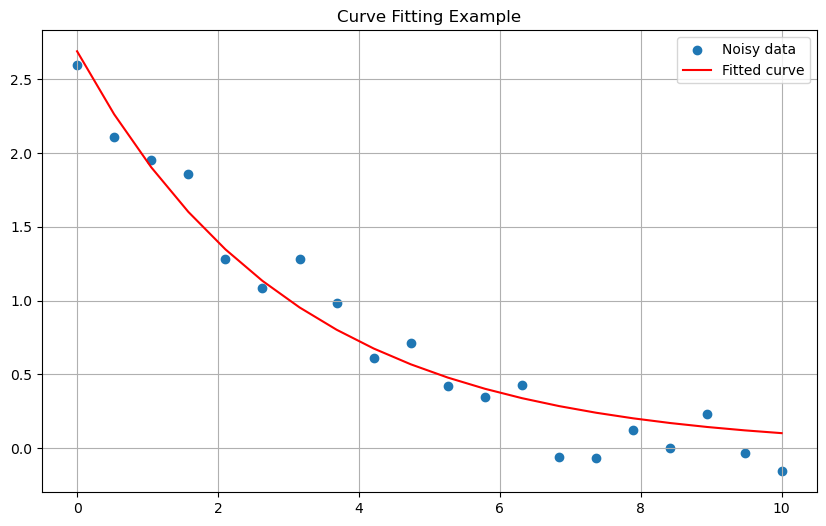

In [4]:
from scipy import optimize

# Define a simple function to minimize: f(x) = (x - 2)² + 3
def objective(x):
    return (x[0] - 2)**2 + 3

# Minimize the function
x0 = [0]  # Starting point
result = optimize.minimize(objective, x0)

print("Function Minimization:")
print(f"Minimum found at x = {result.x[0]:.4f}")
print(f"Minimum value = {result.fun:.4f}")

# Root finding example
def equation(x):
    return x**3 - 2*x**2 - 5*x + 6

# Find a root of the equation
root = optimize.root_scalar(equation, bracket=[0, 3])

print("\nRoot Finding:")
print(f"Root found at x = {root.root:.4f}")
print(f"Function value at root = {equation(root.root):.4e}")

# Curve fitting example
# Generate some noisy data
x_data = np.linspace(0, 10, 20)
def true_func(x, a, b):
    return a * np.exp(-b * x)

y_true = true_func(x_data, 2.5, 0.3)
y_noisy = y_true + 0.2 * np.random.normal(size=len(x_data))

# Fit the data
popt, pcov = optimize.curve_fit(true_func, x_data, y_noisy)

print("\nCurve Fitting:")
print(f"Fitted parameters: a = {popt[0]:.4f}, b = {popt[1]:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_noisy, label='Noisy data')
plt.plot(x_data, true_func(x_data, *popt), 'r-', label='Fitted curve')
plt.legend()
plt.grid(True)
plt.title('Curve Fitting Example')
plt.show()

## 4. Integration with scipy.integrate

The `scipy.integrate` module provides tools for numerical integration, including:
- Definite integrals
- Multiple integrals
- Ordinary differential equations (ODEs)

Here is a list of the key functions in `scipy.integrate` with a description of their purpose:

**General-Purpose Integration (Functions of a given function object)**

*   `quad(func, a, b, ...)`: The primary general-purpose function for integrating a function of one variable over a given interval, which can have infinite limits.
*   `dblquad(func, a, b, gfun, hfun, ...)`: Performs double (two-fold) integration over a specified rectangular or curved region.
*   `tplquad(func, a, b, gfun, hfun, qfun, rfun, ...)`: Performs triple (three-fold) integration.
*   `nquad(func, ranges, ...)`: A flexible function for n-dimensional integration over specified bounds.

**Gaussian Quadrature**

*   `fixed_quad(func, a, b, ...)`: Integrates a function using Gaussian quadrature with a fixed number of evaluation points (order \(n\)).
*   `quadrature(func, a, b, ...)`: Integrates a function using Gaussian quadrature adaptively, increasing the order until a desired tolerance is met.

**Integrating with Sample Data**

*   `trapezoid(y, x=None, ...)`: Computes the integral of a set of samples (data points) using the trapezoidal rule.
*   `simpson(y, x=None, ...)`: Computes the integral of a set of samples using Simpson's rule, which is more accurate for smooth functions.
*   `cumulative_trapezoid(y, x=None, ...)`: Computes the cumulative integral of discrete data using the trapezoidal rule, returning the running total.
*   `romb(y, x=None, ...)`: Computes the integral of equally spaced samples using Romberg integration, which provides high-precision estimates if the number of samples is a power of two plus one (\(2^{k}+1\)).

**Ordinary Differential Equations (ODEs)**

*   `solve_ivp(fun, t_span, y0, ...)`: The recommended function for solving an initial value problem for a system of ordinary differential equations. It supports various methods and adaptive step sizing.
*   `odeint(func, y0, t, ...)`: An older, general-purpose function for integrating ordinary differential equations, which is a wrapper around the more established ODIPACK solvers (VODE and ZVODE routines).
*   `ode(f, jac=None, ...)`: A more object-oriented interface for integrating ODEs using VODE and ZVODE routines.

∫x² dx from 0 to 2 = 2.6667 (error: 2.96e-14)

Double integral = 1.0000 (error: 1.11e-14)


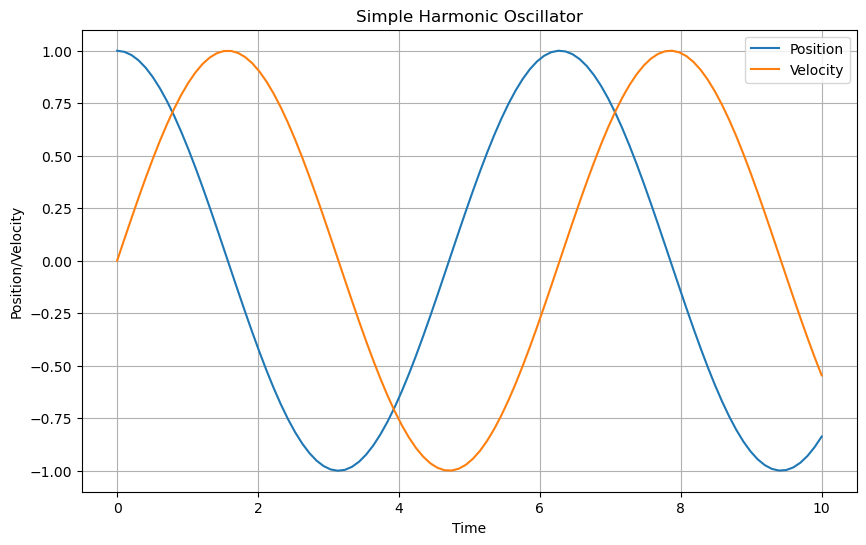

In [5]:
from scipy import integrate

# Definite integral example
def integrand(x):
    return x**2

# Calculate ∫x² dx from 0 to 2
result, error = integrate.quad(integrand, 0, 2)
print(f"∫x² dx from 0 to 2 = {result:.4f} (error: {error:.2e})")

# Multiple integral example
def double_integrand(y, x):
    return x * y

# Calculate double integral over rectangle [0,2]×[0,1]
result, error = integrate.dblquad(double_integrand, 0, 2, lambda x: 0, lambda x: 1)
print(f"\nDouble integral = {result:.4f} (error: {error:.2e})")

# Solving ODEs
def system(t, y):
    return [-y[1], y[0]]  # Simple harmonic oscillator: d²x/dt² = -x

# Initial conditions
y0 = [1, 0]  # [position, velocity]
t = np.linspace(0, 10, 100)

# Solve ODE
solution = integrate.solve_ivp(system, [0, 10], y0, t_eval=t)

# Plot solution
plt.figure(figsize=(10, 6))
plt.plot(t, solution.y[0], label='Position')
plt.plot(t, solution.y[1], label='Velocity')
plt.title('Simple Harmonic Oscillator')
plt.xlabel('Time')
plt.ylabel('Position/Velocity')
plt.legend()
plt.grid(True)
plt.show()

## 5. Linear Algebra with scipy.linalg

The `scipy.linalg` module offers a comprehensive set of functions for linear algebra operations, building on and extending the functionality of `numpy.linalg`. It provides optimized routines for tasks such as solving systems of equations, computing matrix decompositions, and finding eigenvalues. Here are key functions in `scipy.linalg` with a description of their purpose:

**Basic Routines**

*   `inv(a)`: Computes the inverse of a square matrix `a`.
*   `solve(a, b)`: Solves the linear equation system \(a \cdot x = b\) for the unknown \(x\), where `a` is a square matrix.
*   `det(a)`: Computes the determinant of a square matrix `a`.
*   `norm(a, ...)`: Computes various matrix or vector norms (e.g., L1, L2, Frobenius norms).
*   `lstsq(a, b)`: Computes the least-squares solution to the equation \(a \cdot x = b\), particularly useful for over-determined systems (more equations than unknowns).
*   `pinv(a)`: Computes the (Moore-Penrose) pseudo-inverse of a matrix `a`, which works even if `a` is not square or invertible.
*   `kron(a, b)`: Computes the Kronecker product of two matrices.

**Matrix Decompositions**

*   `lu(a)`: Computes the LU decomposition of a matrix `a` with partial pivoting, breaking it into lower (L) and upper (U) triangular matrices. `lu_factor()` and `lu_solve()` provide an efficient workflow for solving multiple systems with the same `a` matrix.
*   `svd(a)`: Performs the Singular Value Decomposition (SVD), decomposing matrix `a` into three components: U, s (singular values), and VH (Hermitian transpose of V).
*   `cholesky(a)`: Computes the Cholesky decomposition of a Hermitian (or symmetric) positive-definite matrix `a` into a lower triangular matrix L such that \(a=LL^{H}\). `cho_factor()` and `cho_solve()` are used for efficient system solving.
*   `qr(a)`: Computes the QR decomposition of a matrix `a`, factoring it into an orthogonal matrix Q and an upper triangular matrix R.
*   `schur(a)`: Computes the Schur decomposition of a matrix `a`.
*   `hessenberg(a)`: Computes the Hessenberg form of a matrix, which has zero entries below the first sub-diagonal.

**Eigenvalue Problems**

*   `eig(a)`: Computes the eigenvalues and (optionally) right eigenvectors of a square matrix `a`.
*   `eigh(a)`: Computes the eigenvalues and eigenvectors of a Hermitian or real symmetric matrix `a`.
*   `eigvals(a)`: Computes the eigenvalues of a square matrix `a` without computing the eigenvectors.
*   `eigvalsh(a)`: Computes the eigenvalues of a Hermitian or real symmetric matrix `a` without computing the eigenvectors.

**Special Matrices**

*   `block_diag(...)`: Creates a block diagonal matrix from provided arrays.
*   `circulant(c)`: Creates a circulant matrix from a vector `c`.
*   `toeplitz(c, r=None)`: Creates a Toeplitz matrix from a column `c` and optionally a row `r`.
*   `hankel(c, r=None)`: Creates a Hankel matrix from a first column `c` and optionally a last row `r`.

**Matrix Functions**

*   `expm(A)`: Computes the matrix exponential of a square matrix A.
*   `logm(A)`: Computes the matrix logarithm of a square matrix A.
*   `sinm(A)`, `cosm(A)`, `tanm(A)`: Compute the matrix trigonometric functions.

**Linear System Solvers**

*   `solve_banded(l_and_u, ab, b)`: Solves a banded linear system.
*   `solve_triangular(A, b, lower=False)`: Solves a triangular system of equations.

In [6]:
from scipy import linalg

# Create sample matrices
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

# Solve linear system Ax = b
x = linalg.solve(A, b)
print("Solution to Ax = b:")
print(f"x = {x}")
print(f"Verification: Ax = {A @ x}")

# Eigenvalues and eigenvectors
eigenvals, eigenvecs = linalg.eig(A)
print("\nEigenvalues:")
print(eigenvals)
print("\nEigenvectors:")
print(eigenvecs)

# Matrix decompositions
# LU decomposition
P, L, U = linalg.lu(A)
print("\nLU decomposition:")
print("L =\n", L)
print("U =\n", U)

# QR decomposition
Q, R = linalg.qr(A)
print("\nQR decomposition:")
print("Q =\n", Q)
print("R =\n", R)

# Singular Value Decomposition (SVD)
U, s, Vh = linalg.svd(A)
print("\nSVD:")
print("Singular values =", s)

# Matrix norms
print("\nMatrix norms:")
print(f"Frobenius norm: {linalg.norm(A, 'fro'):.4f}")
print(f"2-norm: {linalg.norm(A, 2):.4f}")
print(f"1-norm: {linalg.norm(A, 1):.4f}")
print(f"∞-norm: {linalg.norm(A, np.inf):.4f}")

Solution to Ax = b:
x = [-4.   4.5]
Verification: Ax = [5. 6.]

Eigenvalues:
[-0.37228132+0.j  5.37228132+0.j]

Eigenvectors:
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]

LU decomposition:
L =
 [[1.         0.        ]
 [0.33333333 1.        ]]
U =
 [[3.         4.        ]
 [0.         0.66666667]]

QR decomposition:
Q =
 [[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
R =
 [[-3.16227766 -4.42718872]
 [ 0.         -0.63245553]]

SVD:
Singular values = [5.4649857  0.36596619]

Matrix norms:
Frobenius norm: 5.4772
2-norm: 5.4650
1-norm: 6.0000
∞-norm: 7.0000


## 6. Statistics with scipy.stats

The `scipy.stats` module is a powerful library in SciPy that contains a vast collection of functions and classes for probability distributions, descriptive statistics, and hypothesis testing. Here is a list of key functions and areas within `scipy.stats` with a description of their purpose:

**Probability Distributions**

`scipy.stats` includes over 100 continuous and discrete probability distributions (e.g., `norm`, `expon`, `binom`, `poisson`) that can be used for modeling data, generating random variables, and performing probability calculations. Each distribution object typically has the following common methods:

*   `.rvs()`: Generates random variates (samples) from the distribution.
*   `.pdf()` / `.pmf()`: Computes the Probability Density Function (for continuous distributions) or Probability Mass Function (for discrete distributions).
*   `.cdf()`: Computes the Cumulative Distribution Function.
*   `.ppf()`: Computes the Percent Point Function (the inverse of the CDF, or quantile function).
*   `.fit()`: Fits the distribution's parameters (e.g., mean and standard deviation) to a given dataset using maximum likelihood estimation.

**Descriptive Statistics**

These functions summarize the main features of a dataset, such as central tendency and variability.

*   `describe(a, ...)`: Computes several descriptive statistics (mean, variance, skewness, kurtosis, etc.) of the passed array at once.
*   `mean(a, ...)` / `tmean(a, ...)`: Computes the arithmetic mean (or trimmed mean for robust statistics).
*   `median(a, ...)` / `mode(a, ...)`: Finds the middle value when sorted (median) or the most frequently occurring value (mode).
*   `variance(a, ...)` / `std(a, ...)`: Computes the variance and standard deviation.
*   `skew(a, ...)` / `kurtosis(a, ...)`: Measures the asymmetry (skewness) and "tailedness" (kurtosis) of the data distribution.
*   `iqr(x, ...)`: Computes the Interquartile Range (IQR) of the data.
*   `zscore(a, ...)`: Calculates the Z-score for each value in an array, standardizing the data to a mean of zero and a standard deviation of one.

**Hypothesis Testing**

`scipy.stats` provides functions for various statistical tests to determine if there is enough evidence to reject a null hypothesis.

*   `ttest_ind(a, b, ...)`: Performs an independent samples t-test to compare the means of two groups.
*   `ttest_rel(a, b, ...)`: Performs a paired samples t-test to compare the means of two related groups.
*   `chisquare(f_obs, f_exp=None, ...)`: Performs a chi-square test for goodness of fit.
*   `kstest(rvs, cdf, ...)`: Performs the Kolmogorov-Smirnov test for goodness of fit.
*   `ranksums(x, y, ...)`: Performs the Wilcoxon rank-sum test (Mann-Whitney U test) for comparing two independent samples.
*   `wilcoxon(x, y=None, ...)`: Performs the Wilcoxon signed-rank test for comparing two paired samples.
*   `kruskal(args, ...)`: Performs the Kruskal-Wallis H-test for comparing more than two independent samples.
*   `friedmanchisquare(args, ...)`: Performs the Friedman test for comparing more than two related samples.
*   `f_oneway(args)`: Performs a one-way ANOVA (Analysis of Variance) for comparing the means of two or more groups.

**Statistical Tests and Utilities**

*   `linregress(x, y)`: Computes a linear least-squares regression for two sets of measurements.
*   `spearmanr(a, b=None, ...)`: Computes the Spearman rank-order correlation coefficient.
*   `pearsonr(x, y)`: Computes the Pearson correlation coefficient and the p-value for testing non-correlation.
*   `normaltest(a, ...)`: Tests whether a sample differs significantly from a normal distribution.
*   `anderson(x, dist='norm')`: Performs the Anderson-Darling test for goodness of fit to a specific distribution.

**Kernel Density Estimation**

*   `gaussian_kde(dataset, bw_method=None, ...)`: Performs Kernel Density Estimation (KDE) to estimate the probability density function of a dataset.

This list is not exhaustive, but it covers many of the most frequently used functions and capabilities within the `scipy.stats` module.

Basic Statistics:
Mean: 10.06
Standard deviation: 1.96
Median: 10.08

Normality test p-value: 0.3012

One-sample t-test:
t-statistic: 1.0160
p-value: 0.3099


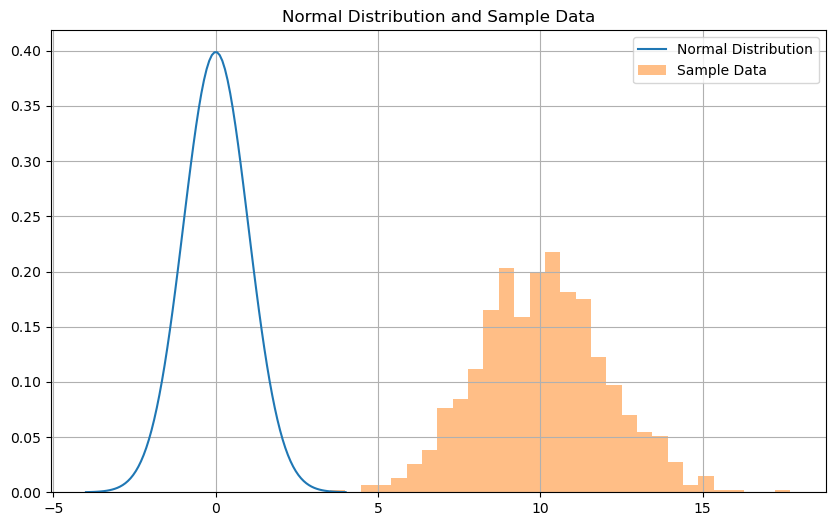


Pearson correlation coefficient: 0.9671
P-value: 4.7424e-60


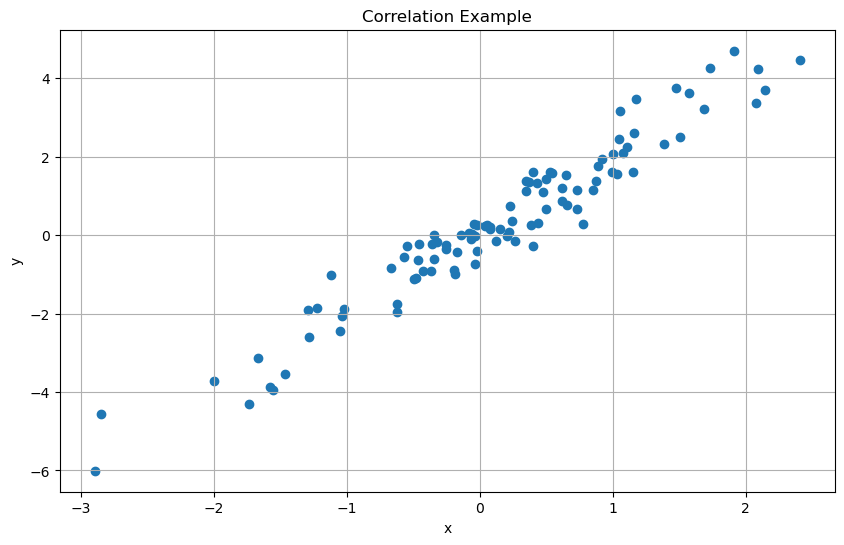

In [7]:
from scipy import stats

# Generate sample data
data = np.random.normal(loc=10, scale=2, size=1000)

# Basic statistics
print("Basic Statistics:")
print(f"Mean: {np.mean(data):.2f}")
print(f"Standard deviation: {np.std(data):.2f}")
print(f"Median: {np.median(data):.2f}")

# Normality test
statistic, p_value = stats.normaltest(data)
print(f"\nNormality test p-value: {p_value:.4f}")

# T-test
t_stat, t_p_value = stats.ttest_1samp(data, 10)
print(f"\nOne-sample t-test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {t_p_value:.4f}")

# Probability distributions
# Normal distribution
x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x, loc=0, scale=1)

# Plot normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution')
plt.hist(data, density=True, bins=30, alpha=0.5, label='Sample Data')
plt.title('Normal Distribution and Sample Data')
plt.legend()
plt.grid(True)
plt.show()

# Correlation analysis
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.5, 100)

correlation, p_value = stats.pearsonr(x, y)
print(f"\nPearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

# Plot correlation
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title('Correlation Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## 7. Signal Processing with scipy.signal

The `scipy.signal` module provides a wide array of functions for signal processing. Here is a list of key functions in `scipy.signal` with a description of their purpose:

**Filtering**

*   `filtfilt(b, a, x, ...)`: Applies a digital filter forward and backward to a signal to avoid phase distortion.
*   `butter(N, Wn, ...)`: Designs an Nth-order digital or analog Butterworth filter.
*   `cheby1(N, rp, Wn, ...)`: Designs an Nth-order digital or analog Chebyshev Type I filter.
*   `firwin(numtaps, cutoff, ...)`: Designs a linear-phase FIR filter using the window method.
*   `iirfilter(N, Wn, ...)`: Designs an Nth-order digital or analog IIR filter.
*   `savgol_filter(x, window_length, polyorder, ...)`: Applies a Savitzky-Golay filter to a signal.

**Spectral Analysis**

*   `periodogram(x, fs=1.0, ...)`: Estimates the Power Spectral Density (PSD) of a signal using the periodogram method.
*   `welch(x, fs=1.0, ...)`: Estimates the Power Spectral Density (PSD) using Welch's method.
*   `spectrogram(x, fs=1.0, ...)`: Computes a spectrogram of a signal.
*   `coherence(x, y, fs=1.0, ...)`: Estimates the magnitude squared coherence estimate of two signals.

**Convolution**

*   `convolve(in1, in2, mode='full')`: Convolves two N-dimensional arrays.
*   `convolve2d(in1, in2, mode='full')`: Convolves two 2-dimensional arrays.

**LTI Systems**

*   `lti(num, den, ...)`: Creates an LTI (Linear Time-Invariant) system object from transfer function coefficients.
*   `bode(system, ...)`: Calculates the magnitude, phase, and angular frequency for a Bode plot of an LTI system.
*   `freqresp(system, w=None)`: Calculates the frequency response of an LTI system.
*   `impulse(system, ...)`: Computes the impulse response of an LTI system.
*   `step(system, ...)`: Computes the step response of an LTI system.

**Waveforms**

*   `chirp(t, f0, t1, f1, method='linear', ...)`: Generates a frequency-swept cosine wave.
*   `gausspulse(t, fc=1000, bw=0.5, ...)`: Generates a Gaussian modulated sinusoid (Gaussian pulse).
*   `square(t, duty=0.5)`: Generates a square wave.
*   `锯齿(t, width=1)`: Generates a sawtooth or triangle wave.

**Other Functions**

*   `find_peaks(x, height=None, ...)`: Finds peaks inside a signal based on peak properties.
*   `resample(x, num, ...)`: Resamples a signal to `num` samples using Fourier method.
*   `decimate(x, q, ...)`: Downsamples a signal after applying an anti-aliasing filter.
*   `hilbert(x, ...)`: Computes the analytic signal of `x` using the Hilbert transform.

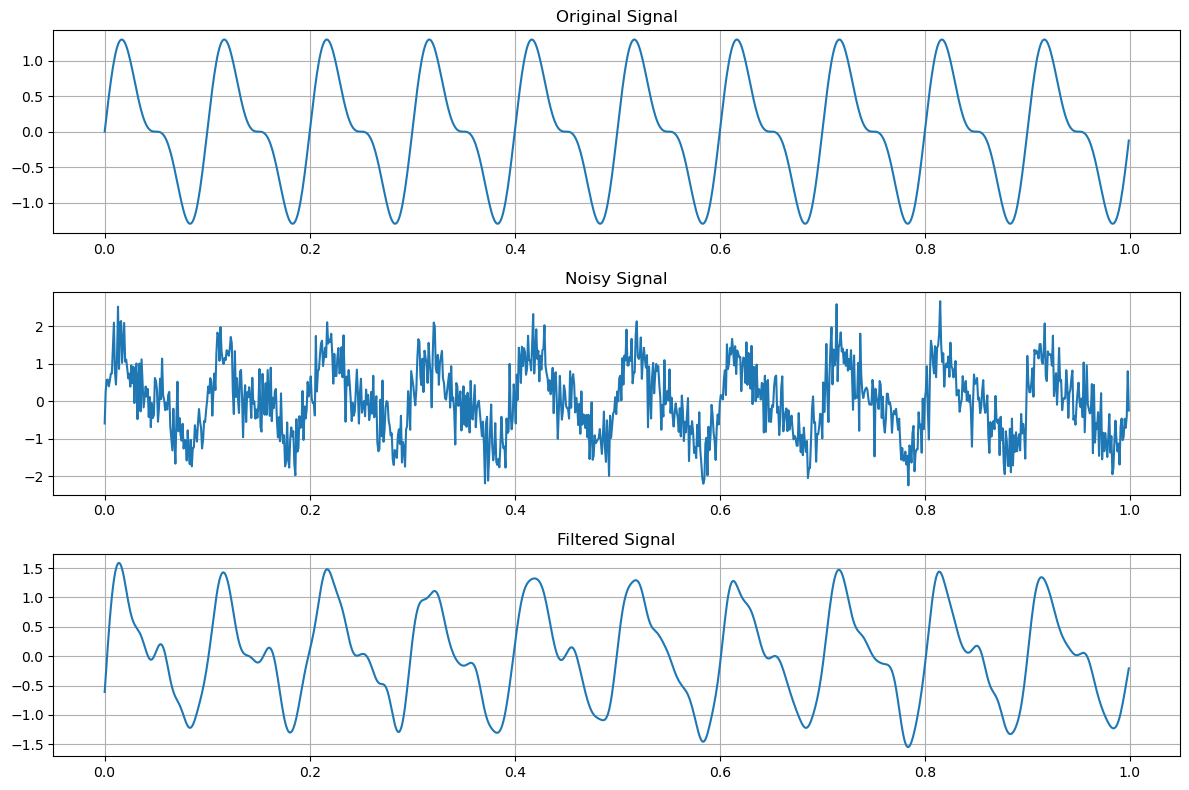

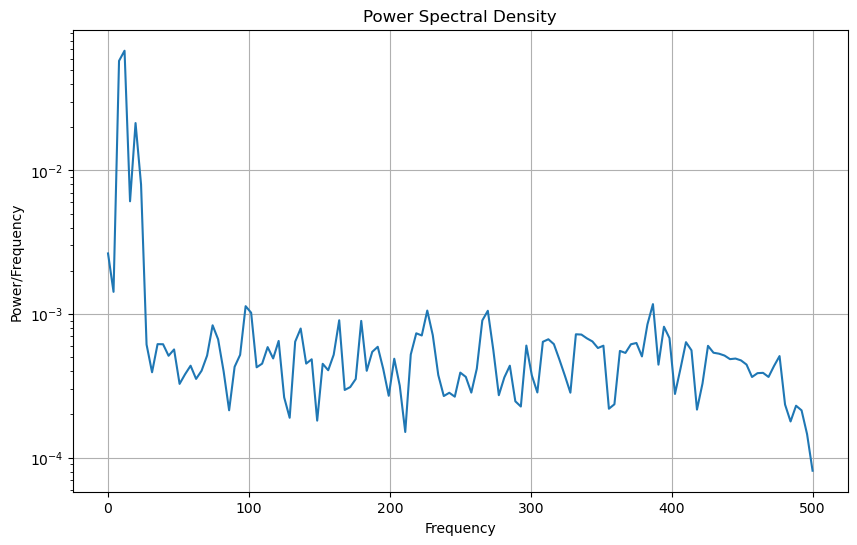

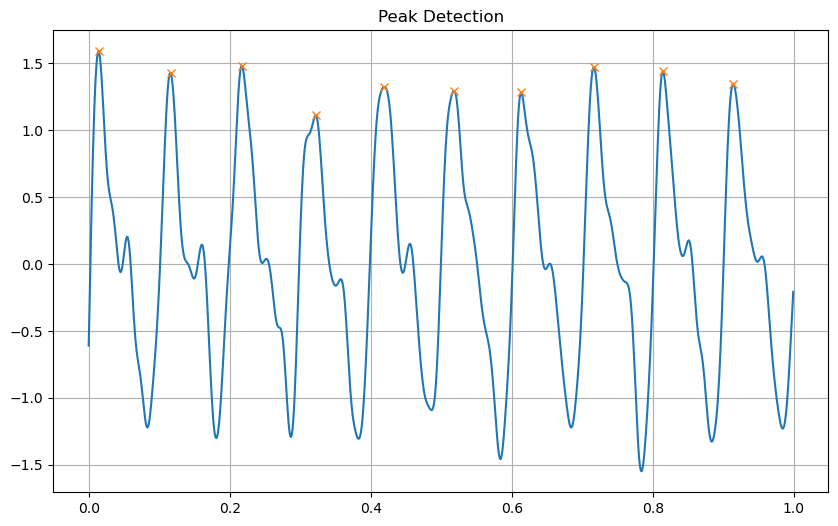

In [8]:
from scipy import signal

# Generate a sample signal
t = np.linspace(0, 1, 1000, endpoint=False)
clean_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)
noisy_signal = clean_signal + np.random.normal(0, 0.5, clean_signal.shape)

# Design a low-pass filter
b, a = signal.butter(4, 0.1, 'low')  # 4th order Butterworth filter
filtered_signal = signal.filtfilt(b, a, noisy_signal)

# Plot signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal)
plt.title('Original Signal')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute and plot power spectral density
frequencies, power_density = signal.welch(noisy_signal, fs=1000)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_density)
plt.title('Power Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Power/Frequency')
plt.grid(True)
plt.show()

# Find peaks in the signal
peaks, properties = signal.find_peaks(filtered_signal, height=0.5)
plt.figure(figsize=(10, 6))
plt.plot(t, filtered_signal)
plt.plot(t[peaks], filtered_signal[peaks], "x")
plt.title('Peak Detection')
plt.grid(True)
plt.show()

## 8. Mini-Project: Signal Analysis and Filtering

Let's create a mini-project that combines several SciPy modules to analyze and process a complex signal. We'll:
1. Generate a complex signal with multiple frequency components
2. Add noise to the signal
3. Apply different filters
4. Analyze the frequency components
5. Detect and measure features in the signal

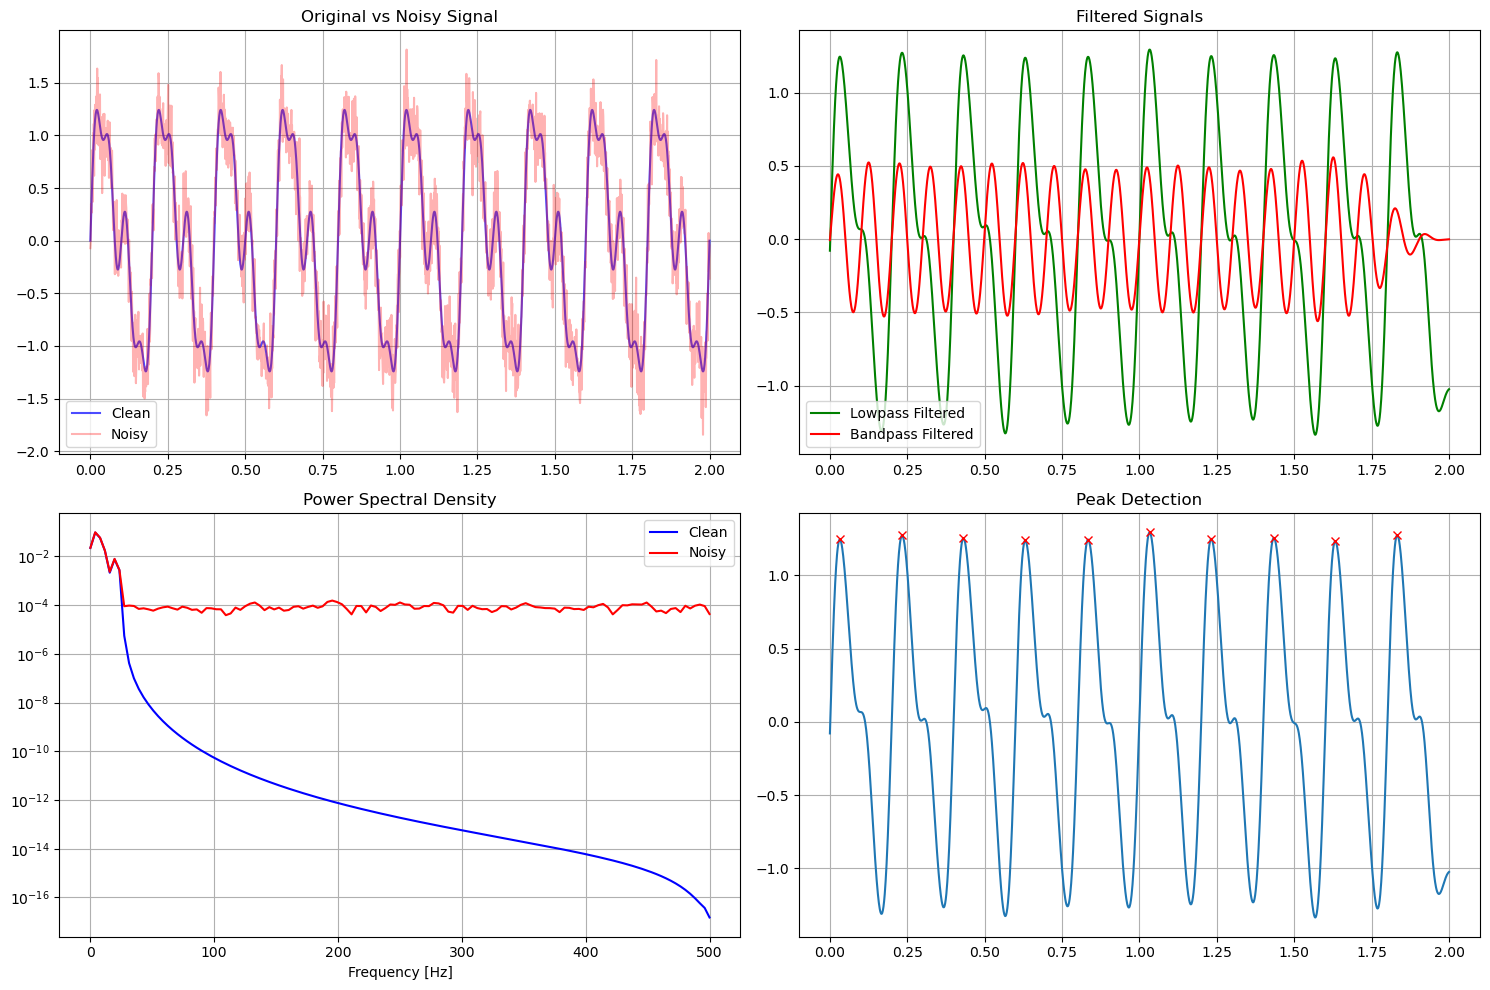

Signal Statistics:
Clean signal std: 0.818
Noisy signal std: 0.850
Filtered signal std: 0.794

Correlation between clean and filtered signal: 0.970

Signal-to-Noise Ratio:
Original: 12.16 dB
After filtering: 12.23 dB


In [9]:
import numpy as np
from scipy import signal, stats
import matplotlib.pyplot as plt

# Generate time array
t = np.linspace(0, 2, 2000)

# Generate complex signal with multiple frequency components
signal_clean = (1.0 * np.sin(2 * np.pi * 5 * t) +    # 5 Hz component
                0.5 * np.sin(2 * np.pi * 10 * t) +    # 10 Hz component
                0.3 * np.sin(2 * np.pi * 20 * t))     # 20 Hz component

# Add noise
noise = np.random.normal(0, 0.2, len(t))
signal_noisy = signal_clean + noise

# Design filters
b_low, a_low = signal.butter(4, 15, 'low', fs=1000)
b_band, a_band = signal.butter(4, [8, 12], 'band', fs=1000)

# Apply filters
signal_lowpass = signal.filtfilt(b_low, a_low, signal_noisy)
signal_bandpass = signal.filtfilt(b_band, a_band, signal_noisy)

# Compute frequency spectra
freqs_clean, psd_clean = signal.welch(signal_clean, fs=1000)
freqs_noisy, psd_noisy = signal.welch(signal_noisy, fs=1000)
freqs_lowpass, psd_lowpass = signal.welch(signal_lowpass, fs=1000)

# Plot results
plt.figure(figsize=(15, 10))

# Time domain signals
plt.subplot(2, 2, 1)
plt.plot(t, signal_clean, 'b-', label='Clean', alpha=0.7)
plt.plot(t, signal_noisy, 'r-', label='Noisy', alpha=0.3)
plt.title('Original vs Noisy Signal')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, signal_lowpass, 'g-', label='Lowpass Filtered')
plt.plot(t, signal_bandpass, 'r-', label='Bandpass Filtered')
plt.title('Filtered Signals')
plt.legend()
plt.grid(True)

# Frequency domain
plt.subplot(2, 2, 3)
plt.semilogy(freqs_clean, psd_clean, 'b-', label='Clean')
plt.semilogy(freqs_noisy, psd_noisy, 'r-', label='Noisy')
plt.title('Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.grid(True)

# Find peaks in filtered signal
peaks, _ = signal.find_peaks(signal_lowpass, height=0.5, distance=50)
plt.subplot(2, 2, 4)
plt.plot(t, signal_lowpass)
plt.plot(t[peaks], signal_lowpass[peaks], "rx")
plt.title('Peak Detection')
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistical analysis
print("Signal Statistics:")
print(f"Clean signal std: {np.std(signal_clean):.3f}")
print(f"Noisy signal std: {np.std(signal_noisy):.3f}")
print(f"Filtered signal std: {np.std(signal_lowpass):.3f}")

# Correlation analysis
correlation = stats.pearsonr(signal_clean, signal_lowpass)
print(f"\nCorrelation between clean and filtered signal: {correlation[0]:.3f}")

# SNR calculation
def calculate_snr(clean, noisy):
    noise = noisy - clean
    return 20 * np.log10(np.std(clean) / np.std(noise))

snr_original = calculate_snr(signal_clean, signal_noisy)
snr_filtered = calculate_snr(signal_clean, signal_lowpass)
print(f"\nSignal-to-Noise Ratio:")
print(f"Original: {snr_original:.2f} dB")
print(f"After filtering: {snr_filtered:.2f} dB")